## Replicação - Saxe

In [ ]:
import numpy as np
from sklearn.metrics import mutual_info_score
from npeet import entropy_estimators as ee
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

torch.manual_seed(0)
data = torch.randn(1000, 4)
targets = torch.zeros(1000, 2)
targets[data[:,0] > 2, 1] = 1 
targets[data[:,0] <= 2, 0] = 1

class PolicyNet(nn.Module):
    def __init__(self):
        super(PolicyNet, self).__init__()
        self.fc1 = nn.Linear(4, 64)  # Assign to self.fc1
        self.fc2 = nn.Linear(64, 64) # Assign to self.fc2
        self.fc3 = nn.Linear(64, 2)  # Assign to self.fc3

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

def tensor_to_np(tensor):
    return tensor.detach().clone().cpu().numpy()

model = PolicyNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


# Número de épocas
num_epochs = 100
mutual_info = [[] for _ in range(14)]
for epoch in range(num_epochs):
    outputs = model(data)
    loss = criterion(outputs, targets)  
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    with torch.no_grad():
        input_layer = data
        layer1_activations = torch.tanh(model.fc1(input_layer))
        layer2_activations = torch.tanh(model.fc2(layer1_activations))
        layer3_activations = model.fc3(layer2_activations)
        output_layer = model(data)
        
        mutual_info[0].append(ee.mi(input_layer, layer1_activations))
        mutual_info[1].append(ee.mi(input_layer, layer2_activations))
        mutual_info[2].append(ee.mi(input_layer, layer3_activations))
        mutual_info[3].append(ee.mi(input_layer, output_layer))

        mutual_info[4].append(ee.mi(layer1_activations, layer2_activations))
        mutual_info[5].append(ee.mi(layer1_activations, layer3_activations))
        mutual_info[6].append(ee.mi(layer1_activations, output_layer))
    
        mutual_info[7].append(ee.mi(layer2_activations, layer3_activations))
        mutual_info[8].append(ee.mi(layer2_activations, output_layer))
        
        mutual_info[9].append(ee.mi(layer3_activations, output_layer))
        
        mutual_info[10].append(ee.mi(layer1_activations, targets))
        mutual_info[11].append(ee.mi(layer2_activations, targets))
        mutual_info[12].append(ee.mi(layer3_activations, targets))
        mutual_info[13].append(ee.mi(output_layer, targets))
mutual_info = np.array(mutual_info)

KeyboardInterrupt: 

C:\Users\Arthur\AppData\Local\Temp\ipykernel_19224\3603815493.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[1, 0.05, 0.95, 1]) # Adjust rect to leave space for colorbar on the right
C:\Users\Arthur\AppData\Local\Temp\ipykernel_19224\3603815493.py:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[1, 0.05, 0.95, 1]) # Adjust rect to leave space for colorbar on the right


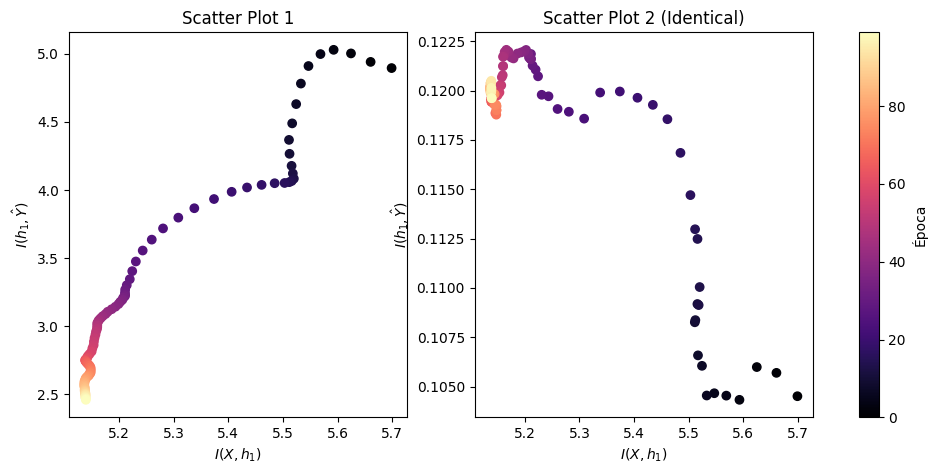

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

norm = Normalize(vmin=0, vmax=num_epochs - 1)
fig, axs = plt.subplots(1, 2, figsize=(12, 5)) 

scatter1 = axs[0].scatter(mutual_info[0], mutual_info[4], c=np.arange(0, num_epochs), cmap='magma', norm=norm)
axs[0].set_xlabel('$I(X, h_1)$')
axs[0].set_ylabel('$I(h_1, \\hat Y)$')
axs[0].set_title('Scatter Plot 1') # Add a title for clarity

scatter2 = axs[1].scatter(mutual_info[0], mutual_info[10], c=np.arange(0, num_epochs), cmap='magma', norm=norm)
axs[1].set_xlabel('$I(X, h_1)$')
axs[1].set_ylabel('$I(h_1, \\hat Y)$')
axs[1].set_title('Scatter Plot 2 (Identical)') # Add a title for clarity

cbar = fig.colorbar(scatter1, ax=axs.ravel().tolist(), label='Época', orientation='vertical')
plt.tight_layout(rect=[1, 0.05, 0.95, 1]) # Adjust rect to leave space for colorbar on the right
plt.show()

In [ ]:
import numpy as np
mutual_info = []
for peso1 in np.linspace(0,10, 1000):
    y = torch.tanh(data*peso1)
    bins = torch.linspace(-1, 1, 30)
    indices = torch.bucketize(y, bins)
    mutual_info.append(ee.mi(data,indices))

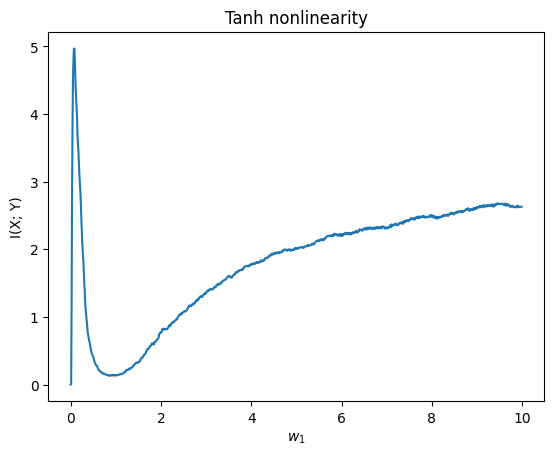

In [ ]:
plt.plot(np.arange(0,10, 1/100), mutual_info)
plt.title('Tanh nonlinearity')
plt.xlabel(r'$w_1$')
plt.ylabel('I(X; Y)')
plt.show()

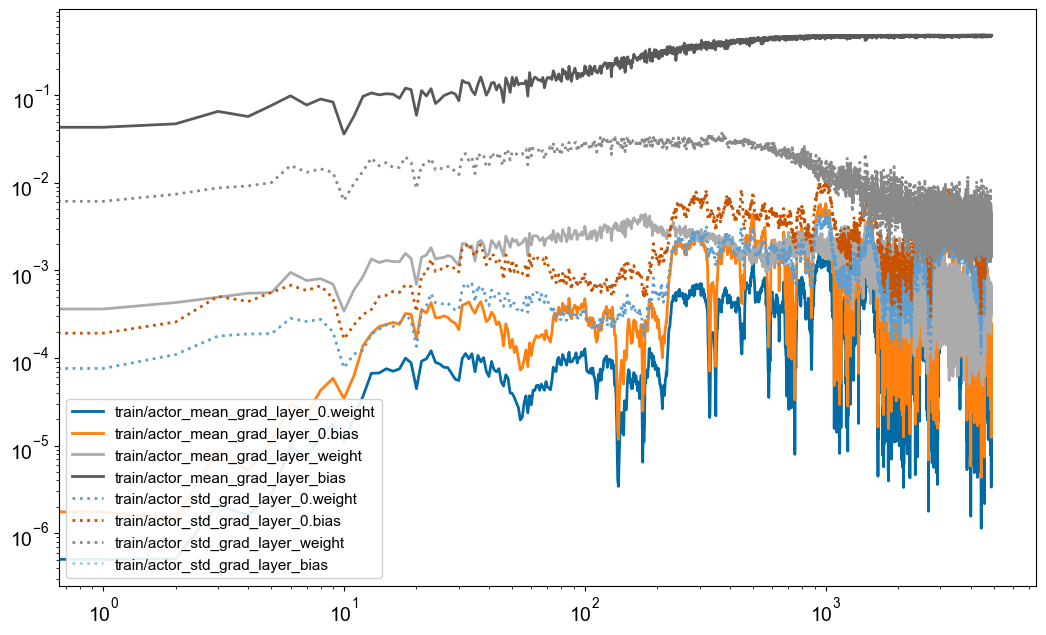

In [ ]:
# média e std - replicação Saxe
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('style.mplstyle')
df = pd.read_csv('teste/173/resultados.csv')
for column in df.filter(like = 'train/actor_mean').columns:
    plt.plot(df[column], label = column, linestyle = '-')
for column in df.filter(like = 'train/actor_std').columns:
    plt.plot(df[column], label = column, linestyle = 'dotted')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.tight_layout()
plt.show()